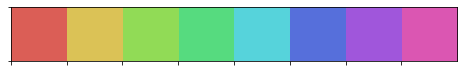

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette('hls', 8))

(-2.633376988366743,
 2.2969503067112957,
 -2.757969134651851,
 3.0521688354239918)

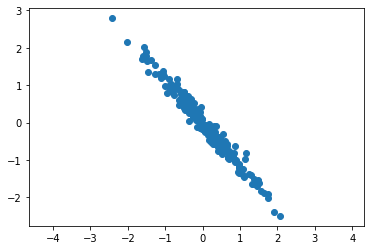

In [2]:
rng = np.random.RandomState(6)
X = np.dot(rng.randn(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [4]:
print(pca.components_)


[[-0.65078562  0.75926153]
 [ 0.75926153  0.65078562]]


In [5]:
print(pca.explained_variance_)


[1.43663189 0.00953551]


(-2.633376988366743,
 2.2969503067112957,
 -2.757969134651851,
 3.0521688354239918)

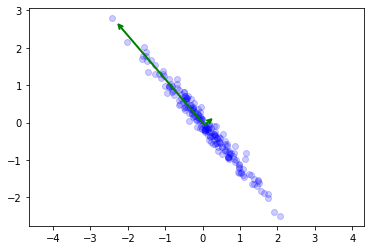

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='green')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=.2, color='blue')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')


## 使用PCA进行降维


In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('Original shape:', X.shape)
print('Transformed shape:', X_pca.shape)


Original shape: (200, 2)
Transformed shape: (200, 1)


(-2.6351226440736277,
 2.333609076555878,
 -2.758348805900798,
 3.0601419316518768)

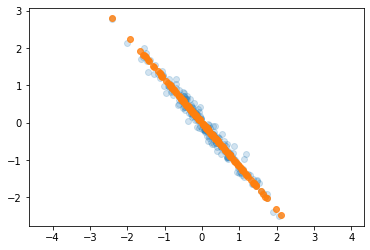

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=.8)
plt.axis('equal')


## PCA可视化


In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [10]:
pca = PCA()
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 64)


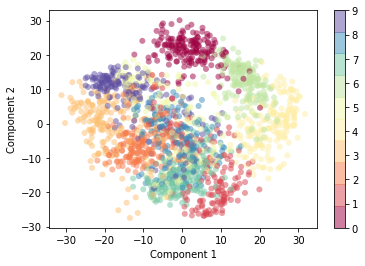

In [11]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolors='none', alpha=.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

## 如何选择最佳的主成分数量

Text(0, 0.5, 'Cumulative explained variance')

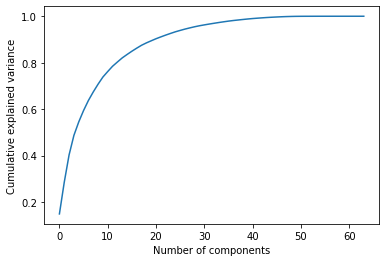

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


## PCA用于降噪


In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

    plot_digits(digits.data)

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
#plot_digits(noisy)

In [15]:
pca = PCA(0.50).fit(noisy)
pca.n_components_


12

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
#plot_digits(filtered)

## 实例：特征脸Eigenfaces


In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=80)
print(faces.target_names)
print(faces.images.shape)


['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [19]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)


PCA(n_components=150)

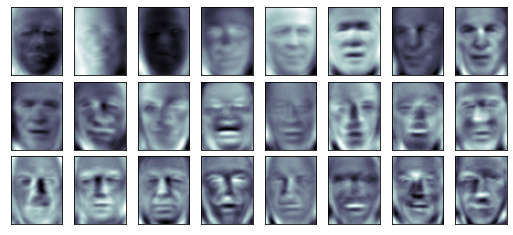

In [20]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


In [22]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)


Text(0, 0.5, '150-dim\nreconstruction')

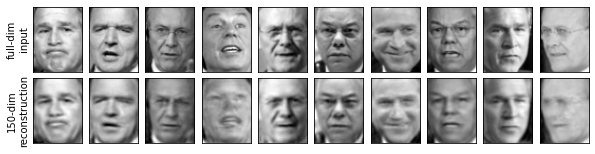

In [23]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
